# Problem Statement:

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

# 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import stats


In [2]:

df=pd.read_csv('Transport.csv')
df.head()


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [3]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


#Descriptive statistics is the process of using statistical techniques to describe or summarize a set of data. As one of the major types of data analysis, descriptive analysis is popular for its ability to generate accessible insights from otherwise uninterpreted data.

In [4]:
df.shape

(444, 9)

In [5]:
df.describe().T          #Checking the 5 point Summary of the Dataset.
##Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution,

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset.

In [6]:
df.isnull().sum() #no null values

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

# 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

# EDA

Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better

In [7]:

print('number of rows:',df.shape[0])
print('number of columns:',df.shape[1])      #shape

number of rows: 444
number of columns: 9


In [8]:
df.size


3996

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [10]:

df.dtypes         #data types
     

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [11]:
df.skew()

Age         0.955276
Engineer   -1.186708
MBA         1.144763
Work Exp    1.352840
Salary      2.044533
Distance    0.539851
license     1.259293
dtype: float64


Making different list for categorical columns and numerical columns

In [12]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


The above output shows that there is no “null” value in our dataset. (“?” or ” ”) these two symbols are most commonly detected. 

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables 
with values as “?”.

In [13]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Gender : 0
Transport : 0


The output of the above code snippet shows that there are  no "?" or " " present in the data set

# Data preprocessing


We need some summary statistics of our dataframe. For this, we can use describe() method. It can be used to generate various summary statistics.

 Describe for numerical and categorical columns

In [14]:
df[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


In [15]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [16]:

#Checking for duplicate data

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]            #no duplicate records

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


### Unique values for categorical variables

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




In [19]:

df.dtypes         #data types

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [20]:
0

0

In [21]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())


Age
26    63
27    49
28    46
24    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
33    11
34    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
35     2
18     2
19     1
42     1
43     1
Name: Age, dtype: int64
Gender
Male      316
Female    128
Name: Gender, dtype: int64
Engineer
1    335
0    109
Name: Engineer, dtype: int64
MBA
0    332
1    112
Name: MBA, dtype: int64
Work Exp
4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64
Salary
14.6    22
8.5     13
13.6    12
12.8    12
14.9    11
        ..
16.7     1
22.7     1
29.9     1
18.9     1
50.0     1
Name: Salary, Length: 122, dtype: int64
Distance
12.2    12
8.1     11
9.0      9
11.7     8
9.4      7
        ..
14.5     1
15.4     1
16.2     1
16.5     1
23.4     1
Name: Distance, Length: 137, dt

In [22]:
#From the above ,we can see that the Categorical variables are :

#Gender
#Engineer
#MBA
#License
#Transport

In [23]:
# Changing the data types of the categorical variables



In [24]:
cat = ['Gender','Engineer','MBA','license','Transport']
for col in cat:
  df[col]=df[col].astype('object')

In [25]:
df.dtypes


Age            int64
Gender        object
Engineer      object
MBA           object
Work Exp       int64
Salary       float64
Distance     float64
license       object
Transport     object
dtype: object

In [26]:
#Making different list for categorical columns and numerical columns

In [27]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Gender', 'Engineer', 'MBA', 'license', 'Transport']
num =  ['Age', 'Work Exp', 'Salary', 'Distance']


In [28]:

df[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Engineer,444,2,1,335
MBA,444,2,0,332
license,444,2,0,340
Transport,444,2,Public Transport,300


In [29]:

df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4


# Univariate Analysis

Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work Exp'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Distance'}>]], dtype=object)

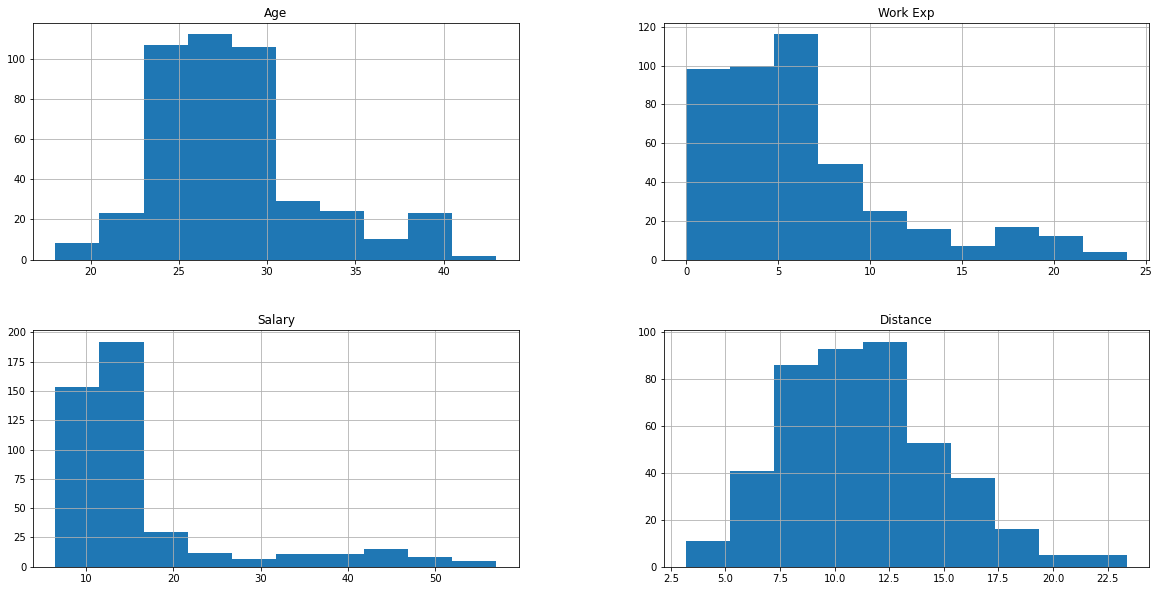

In [30]:

df[num].hist(figsize=(20,10))


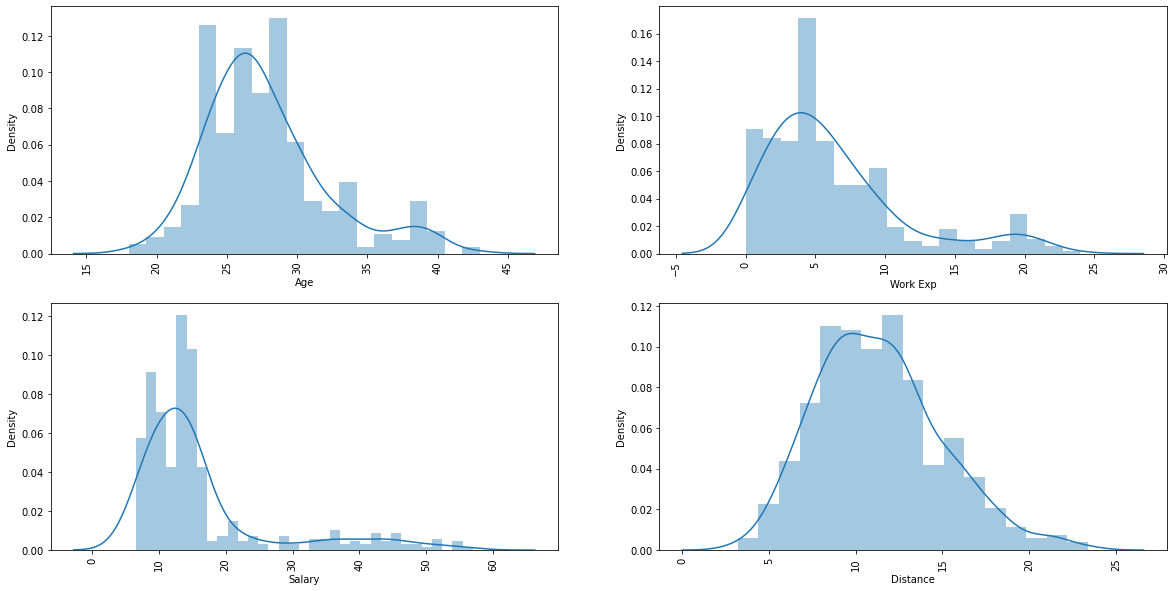

In [31]:

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


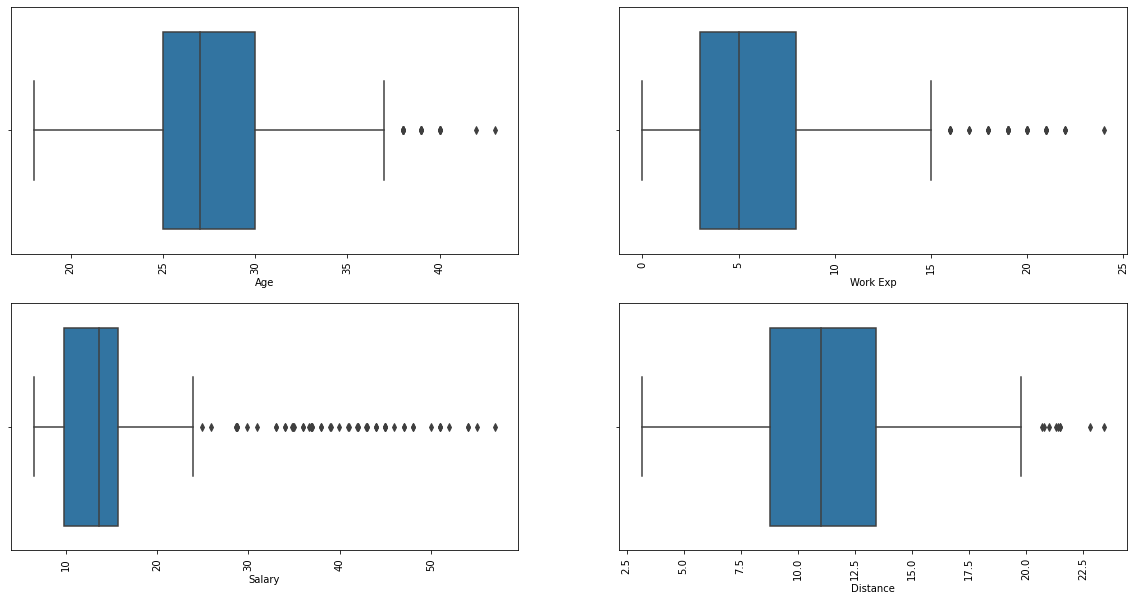

In [32]:

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
     

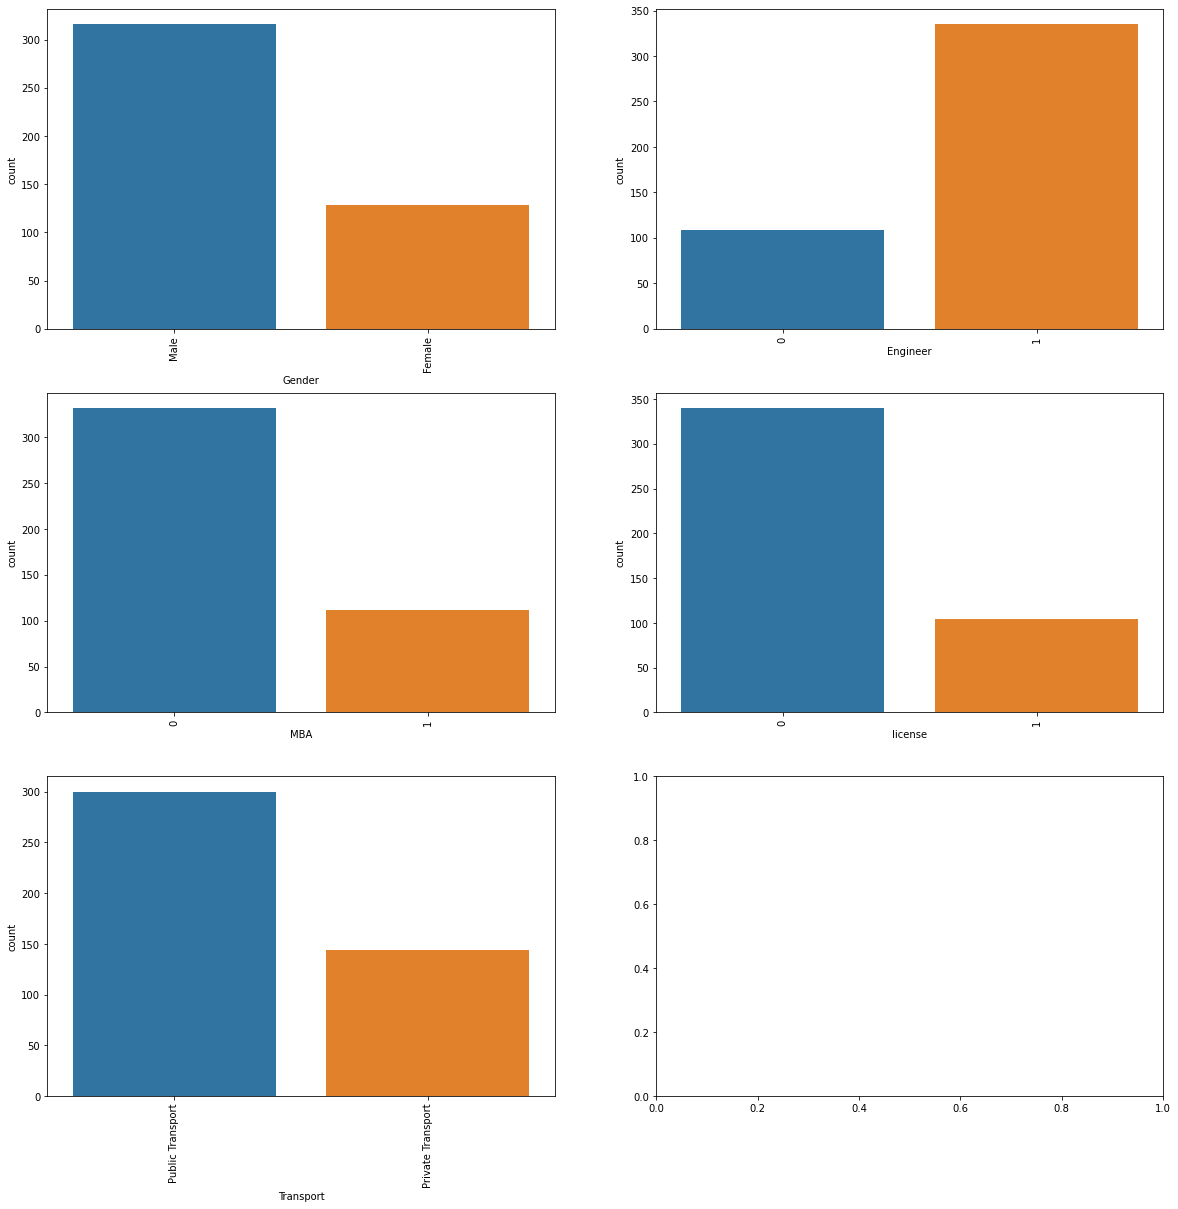

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, subplot in zip(cat, ax.flatten()):
    sns.countplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Multi-variate Analysis


Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to study more complex sets of data. 

In [34]:
cor = df.corr()
cor      #checking for correlation

,Age,Work Exp,Salary,Distance
Age,1.000000,0.932236,0.860673,0.352872
Work Exp,0.932236,1.000000,0.931974,0.372735
Salary,0.860673,0.931974,1.000000,0.442359
Distance,0.352872,0.372735,0.442359,1.000000


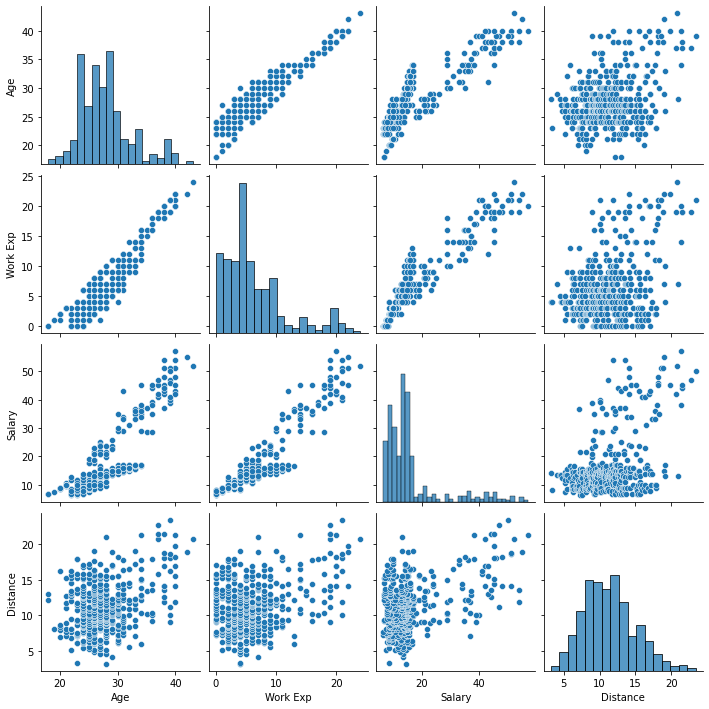

In [35]:

sns.pairplot(df[num])


<Figure size 3600x1800 with 0 Axes>

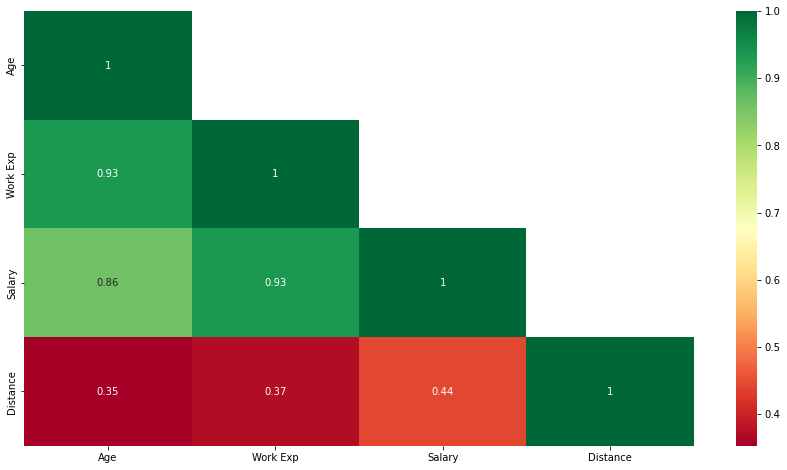

<Figure size 3600x1800 with 0 Axes>

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True,mask=np.triu(cor,+1),cmap='RdYlGn');plt.figure(figsize=(50,25))

In [37]:
#Outlier Treatment

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])


<AxesSubplot:>

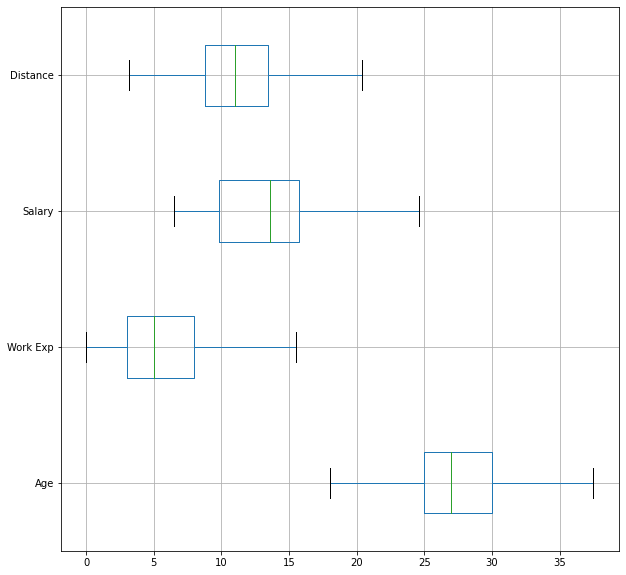

In [40]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)   #NO OUTLIERS NOW AFTER TREATMENT

# 1.3) Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts).

In [41]:
df.head(5)


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,Male,0,0,4.0,14.3,3.2,0,Public Transport
1,23.0,Female,1,0,4.0,8.3,3.3,0,Public Transport
2,29.0,Male,1,0,7.0,13.4,4.1,0,Public Transport
3,28.0,Female,1,1,5.0,13.4,4.5,0,Public Transport
4,27.0,Male,1,0,4.0,13.4,4.6,0,Public Transport


# ONE HOT ENCODING

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [42]:
cat

['Gender', 'Engineer', 'MBA', 'license', 'Transport']

In [43]:
#dropping the target variable form the list cat
cat.remove('Transport')


In [44]:
print("cat",cat)
print("num",num)


cat ['Gender', 'Engineer', 'MBA', 'license']
num ['Age', 'Work Exp', 'Salary', 'Distance']


In [45]:
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,Male,0,0,4.0,14.3,3.2,0,Public Transport
1,23.0,Female,1,0,4.0,8.3,3.3,0,Public Transport
2,29.0,Male,1,0,7.0,13.4,4.1,0,Public Transport
3,28.0,Female,1,1,5.0,13.4,4.5,0,Public Transport
4,27.0,Male,1,0,4.0,13.4,4.6,0,Public Transport
5,26.0,Male,1,0,4.0,12.3,4.8,1,Public Transport
6,28.0,Male,1,0,5.0,14.4,5.1,0,Private Transport
7,26.0,Female,1,0,3.0,10.5,5.1,0,Public Transport
8,22.0,Male,1,0,1.0,7.5,5.1,0,Public Transport
9,27.0,Male,1,0,4.0,13.5,5.2,0,Public Transport


In [46]:
df =pd.get_dummies(df, columns=cat,drop_first=True)


In [47]:

df.head(10)


,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3,3.2,Public Transport,1,0,0,0
1,23.0,4.0,8.3,3.3,Public Transport,0,1,0,0
2,29.0,7.0,13.4,4.1,Public Transport,1,1,0,0
3,28.0,5.0,13.4,4.5,Public Transport,0,1,1,0
4,27.0,4.0,13.4,4.6,Public Transport,1,1,0,0
5,26.0,4.0,12.3,4.8,Public Transport,1,1,0,1
6,28.0,5.0,14.4,5.1,Private Transport,1,1,0,0
7,26.0,3.0,10.5,5.1,Public Transport,0,1,0,0
8,22.0,1.0,7.5,5.1,Public Transport,1,1,0,0
9,27.0,4.0,13.5,5.2,Public Transport,1,1,0,0


In [48]:

df['Transport'] = pd.Categorical(df['Transport']).codes

In [49]:

df.head(10)


,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3,3.2,1,1,0,0,0
1,23.0,4.0,8.3,3.3,1,0,1,0,0
2,29.0,7.0,13.4,4.1,1,1,1,0,0
3,28.0,5.0,13.4,4.5,1,0,1,1,0
4,27.0,4.0,13.4,4.6,1,1,1,0,0
5,26.0,4.0,12.3,4.8,1,1,1,0,1
6,28.0,5.0,14.4,5.1,0,1,1,0,0
7,26.0,3.0,10.5,5.1,1,0,1,0,0
8,22.0,1.0,7.5,5.1,1,1,1,0,0
9,27.0,4.0,13.5,5.2,1,1,1,0,0


In [50]:
# remove spaces from column names
df.columns = df.columns.str.replace(" ", "")

# display the dataframe
df

,Age,WorkExp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3000,3.2000,1,1,0,0,0
1,23.0,4.0,8.3000,3.3000,1,0,1,0,0
2,29.0,7.0,13.4000,4.1000,1,1,1,0,0
3,28.0,5.0,13.4000,4.5000,1,0,1,1,0
4,27.0,4.0,13.4000,4.6000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
439,37.5,15.5,24.6125,20.3625,0,1,1,0,1
440,37.5,15.5,24.6125,20.3625,0,1,1,0,1
441,37.0,15.5,24.6125,20.3625,0,1,1,0,1
442,37.0,15.5,24.6125,20.3625,0,1,0,0,1


# SCALING

As the values of the variables are different,we should do scaling otherwise some of the variables are in different
values and this may get more weightage than the other variables.Scaling will have all the values in the relative same range.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
print(scaled_df)

[[0.51282051 0.25806452 0.43064182 ... 0.         0.         0.        ]
 [0.25641026 0.25806452 0.09937888 ... 1.         0.         0.        ]
 [0.56410256 0.4516129  0.38095238 ... 1.         0.         0.        ]
 ...
 [0.97435897 1.         1.         ... 1.         0.         1.        ]
 [0.97435897 1.         1.         ... 0.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [53]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,Age,WorkExp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,0.512821,0.258065,0.430642,0.000000,1.0,1.0,0.0,0.0,0.0
1,0.256410,0.258065,0.099379,0.005827,1.0,0.0,1.0,0.0,0.0
2,0.564103,0.451613,0.380952,0.052440,1.0,1.0,1.0,0.0,0.0
3,0.512821,0.322581,0.380952,0.075747,1.0,0.0,1.0,1.0,0.0
4,0.461538,0.258065,0.380952,0.081573,1.0,1.0,1.0,0.0,0.0


Train Test Split

In [54]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('Transport', axis=1)

# Copy target into the y dataframe. 
y = scaled_df['Transport']


In [55]:
X.head()


,Age,WorkExp,Salary,Distance,Gender_Male,Engineer_1,MBA_1,license_1
0,0.512821,0.258065,0.430642,0.000000,1.0,0.0,0.0,0.0
1,0.256410,0.258065,0.099379,0.005827,0.0,1.0,0.0,0.0
2,0.564103,0.451613,0.380952,0.052440,1.0,1.0,0.0,0.0
3,0.512821,0.322581,0.380952,0.075747,0.0,1.0,1.0,0.0
4,0.461538,0.258065,0.380952,0.081573,1.0,1.0,0.0,0.0


In [56]:
y.head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Transport, dtype: float64

In [57]:


# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)


In [58]:
X_train.shape

(310, 8)

In [59]:
X_test.shape

(134, 8)

# 1.4) Apply Logistic Regression(4 pts). Interpret the inferences of both model s (2 pts)

In [60]:
import statsmodels.formula.api as SM

In [61]:
f_1 = 'Transport~Age+WorkExp+Salary+Engineer_1+MBA_1+Distance+license_1+Gender_Male'

In [62]:
model_1 = SM.logit(formula=f_1,data=scaled_df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.448655
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            8
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2879
Time:                        22:09:37   Log-Likelihood:                -199.20
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.366e-31
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1109      0.529      3.991      0.000       1.074       3.147
Age             3.6826      1.493      2.467      0.014       0.757       6.608
WorkExp        -4.1015      1.625     -2.525      0.012      -7.286      -0.917
Salary          0.5894      1.058      0.557      0.577      -1.483       2.662
Engineer_1     -0.1756      0.295     -0.595      0.552      -0.754       0.403
MBA_1           0.5551      0.311      1.785      0.074      -0.054       1.165
Distance       -4.3166      0.713     -6.051      0.000      -5.715      -2.918
license_1      -2.2425      0.329     -6.816      0.000      -2.887      -1.598
Gender_Male     1.3077      0.289      4.522      0.000       0.741       1.874
===============================================================================
"""

In [63]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.25935108055302547


In [64]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [65]:
vif_cal(input_data=scaled_df[['Age','WorkExp','Salary','Engineer_1','MBA_1','Distance','license_1','Gender_Male']])

Age  VIF =  6.8
WorkExp  VIF =  13.38
Salary  VIF =  7.09
Engineer_1  VIF =  1.01
MBA_1  VIF =  1.03
Distance  VIF =  1.18
license_1  VIF =  1.35
Gender_Male  VIF =  1.08


In [66]:
#Removing "workexp" as it has the highest VIF.VIF indicates there is multicollinearity problem

In [67]:
f_2 = 'Transport~Age+Salary+Engineer_1+MBA_1+Distance+license_1+Gender_Male'


In [68]:
model_2 = SM.logit(formula=f_2,data=scaled_df).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.455880
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            7
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2765
Time:                        22:09:38   Log-Likelihood:                -202.41
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 4.188e-30
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5965      0.499      5.204      0.000       1.619       3.574
Age             1.0114      1.056      0.957      0.338      -1.059       3.082
Salary         -1.3727      0.730     -1.881      0.060      -2.803       0.058
Engineer_1     -0.1632      0.292     -0.558      0.577      -0.736       0.410
MBA_1           0.4669      0.305      1.530      0.126      -0.131       1.065
Distance       -4.1269      0.699     -5.902      0.000      -5.497      -2.756
license_1      -2.1896      0.323     -6.774      0.000      -2.823      -1.556
Gender_Male     1.2867      0.286      4.494      0.000       0.726       1.848
===============================================================================
"""

In [69]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.2514583226500491


In [70]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [71]:
vif_cal(input_data=scaled_df[['Age','Salary','Engineer_1','MBA_1','Distance','Gender_Male','license_1']])

Age  VIF =  3.59
Salary  VIF =  3.47
Engineer_1  VIF =  1.01
MBA_1  VIF =  1.02
Distance  VIF =  1.18
Gender_Male  VIF =  1.08
license_1  VIF =  1.35


VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop "Engineer_1" because it is not significant.

In [72]:
f_3 = 'Transport~Age+Salary+MBA_1+Distance+license_1+Gender_Male'

In [73]:
model_3 = SM.logit(formula=f_3,data=scaled_df).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.456233
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2759
Time:                        22:09:39   Log-Likelihood:                -202.57
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.160e-31
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4960      0.464      5.380      0.000       1.587       3.405
Age             0.9746      1.053      0.925      0.355      -1.090       3.039
Salary         -1.3654      0.728     -1.875      0.061      -2.793       0.062
MBA_1           0.4503      0.303      1.486      0.137      -0.144       1.044
Distance       -4.1323      0.700     -5.906      0.000      -5.504      -2.761
license_1      -2.1803      0.323     -6.760      0.000      -2.812      -1.548
Gender_Male     1.2804      0.286      4.483      0.000       0.721       1.840
===============================================================================
"""

In [74]:
print('The adjusted pseudo R-square value is',1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.254471894771379


In [75]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [76]:
vif_cal(input_data=scaled_df[['Salary','MBA_1','Age','Distance','Gender_Male','license_1']])

Salary  VIF =  3.47
MBA_1  VIF =  1.02
Age  VIF =  3.58
Distance  VIF =  1.18
Gender_Male  VIF =  1.08
license_1  VIF =  1.34



VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop "Age" because it is not significant

In [77]:
f_4 = 'Transport~Salary+MBA_1+Distance+license_1+Gender_Male'

In [78]:
model_4 = SM.logit(formula=f_4,data=scaled_df).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.457200
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2744
Time:                        22:09:40   Log-Likelihood:                -203.00
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 2.374e-31
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7151      0.402      6.747      0.000       1.926       3.504
Salary         -0.8355      0.450     -1.857      0.063      -1.718       0.046
MBA_1           0.4339      0.302      1.435      0.151      -0.159       1.027
Distance       -4.0985      0.697     -5.877      0.000      -5.465      -2.732
license_1      -2.1194      0.315     -6.727      0.000      -2.737      -1.502
Gender_Male     1.2883      0.285      4.526      0.000       0.730       1.846
===============================================================================
"""

In [79]:
print('The adjusted pseudo R-square value is',1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.25651162551008355


VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop "MBA_1" because it is not significant

In [80]:
f_5 = 'Transport~Salary+Distance+license_1+Gender_Male'

In [81]:
model_5 = SM.logit(formula=f_5,data=scaled_df).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.459586
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      439
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2706
Time:                        22:09:40   Log-Likelihood:                -204.06
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 1.018e-31
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7777      0.402      6.912      0.000       1.990       3.565
Salary         -0.8119      0.446     -1.818      0.069      -1.687       0.063
Distance       -4.0921      0.700     -5.848      0.000      -5.464      -2.721
license_1      -2.1404      0.315     -6.805      0.000      -2.757      -1.524
Gender_Male     1.3331      0.283      4.707      0.000       0.778       1.888
===============================================================================
"""

In [82]:
print('The adjusted pseudo R-square value is',1 - ((model_5.llf - model_5.df_model)/model_5.llnull))

The adjusted pseudo R-square value is 0.2562994321894886


In [83]:
vif_cal(input_data=scaled_df[['Salary','Distance','Gender_Male','license_1']])

Salary  VIF =  1.28
Distance  VIF =  1.17
Gender_Male  VIF =  1.06
license_1  VIF =  1.29


VIF indicates there is no Multicollinearity problem.

Based on 'p value', let's drop "Salary" because it is not significant

In [84]:
f_6 = 'Transport~Distance+license_1+Gender_Male'

In [85]:
model_6 = SM.logit(formula=f_6,data=scaled_df).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.463313
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      440
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2647
Time:                        22:09:41   Log-Likelihood:                -205.71
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 6.787e-32
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5855      0.382      6.773      0.000       1.837       3.334
Distance       -4.3560      0.681     -6.400      0.000      -5.690      -3.022
license_1      -2.3017      0.303     -7.607      0.000      -2.895      -1.709
Gender_Male     1.3638      0.283      4.821      0.000       0.809       1.918
===============================================================================
"""

In [86]:
print('The adjusted pseudo R-square value is',1 - ((model_6.llf - model_6.df_model)/model_6.llnull))

The adjusted pseudo R-square value is 0.2539602246310785


In [87]:
vif_cal(input_data=scaled_df[['Distance','Gender_Male','license_1']])

Distance  VIF =  1.09
Gender_Male  VIF =  1.06
license_1  VIF =  1.15


We notice that the adjusted pseudo R-squared values have increased.

'p values' indicate that all variables are significant at 95% confidence level

In [88]:
# Prediction on the data

In [89]:
y_prob_pred_6 = model_6.predict()
y_prob_pred_6

array([0.9810971 , 0.9282521 , 0.97636084, 0.9051302 , 0.97324782,
       0.77582999, 0.96973756, 0.89122232, 0.96973756, 0.96898376,
       0.88873722, 0.75299015, 0.96742129, 0.7434279 , 0.96661179,
       0.96578289, 0.96317544, 0.86991871, 0.96133204, 0.96133204,
       0.96133204, 0.96133204, 0.86406584, 0.96133204, 0.96037744,
       0.86105705, 0.95940026, 0.95940026, 0.7028308 , 0.85799261,
       0.85799261, 0.95840003, 0.95840003, 0.85487198, 0.85169462,
       0.95737625, 0.68119973, 0.84516772, 0.95415859, 0.95415859,
       0.67007601, 0.83493986, 0.95188637, 0.95071053, 0.65875859,
       0.83141218, 0.95071053, 0.95071053, 0.82782465, 0.82782465,
       0.94950748, 0.82782465, 0.94827666, 0.94827666, 0.94827666,
       0.82417693, 0.94701752, 0.82046868, 0.94701752, 0.94572948,
       0.63558285, 0.94572948, 0.94572948, 0.81669962, 0.81286947,
       0.6296842 , 0.94441196, 0.94441196, 0.94441196, 0.94441196,
       0.94306439, 0.94306439, 0.80897802, 0.94027668, 0.61176

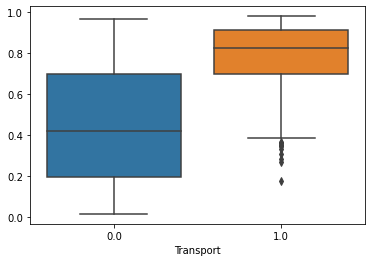

In [90]:
sns.boxplot(x=scaled_df['Transport'],y=y_prob_pred_6)
plt.xlabel('Transport');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable power of the model. Let us take a cut-off of 0.5 first and check.

Let us now see the predicted classes

In [91]:

y_class_pred=(y_prob_pred_6>=0.5).astype(int)        #these are our predictions.wherever we got prob>0.5,we got 1 otherwise 0.
y_class_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [92]:
y_class_pred>0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [93]:
y_prob_pred_5 = model_5.predict()
y_prob_pred_4 = model_4.predict()
y_prob_pred_3 = model_3.predict()
y_prob_pred_2 = model_2.predict()
y_prob_pred_1 = model_1.predict()

# Model Evaluation on the Data

Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

In [94]:
from sklearn import metrics

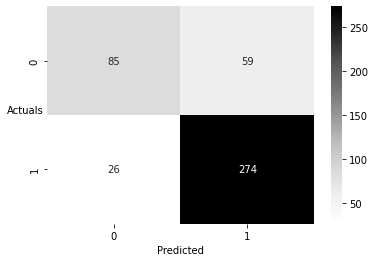

In [95]:
sns.heatmap((metrics.confusion_matrix(scaled_df['Transport'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [96]:
tn, fp, fn, tp = metrics.confusion_matrix(scaled_df['Transport'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 85 
False Positives: 59 
False Negatives: 26 
True Positives: 274


In [97]:
print(metrics.classification_report(scaled_df['Transport'],y_class_pred,digits=3))     #classification report

              precision    recall  f1-score   support

         0.0      0.766     0.590     0.667       144
         1.0      0.823     0.913     0.866       300

    accuracy                          0.809       444
   macro avg      0.794     0.752     0.766       444
weighted avg      0.804     0.809     0.801       444



In [98]:
metrics.accuracy_score(scaled_df['Transport'],y_class_pred) #accuracy score

0.8085585585585585

We have been able to predict 80.8% of the target variables correctly.

AUC: 0.813


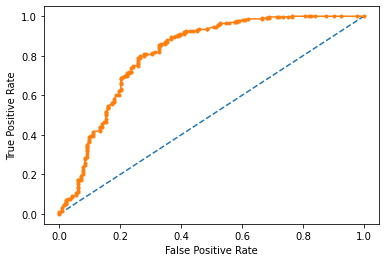

In [99]:
# AUC and ROC for the training data(model_6)



# calculate AUC
auc = metrics.roc_auc_score(scaled_df['Transport'],y_prob_pred_6)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(scaled_df['Transport'],y_prob_pred_6)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC: 0.812


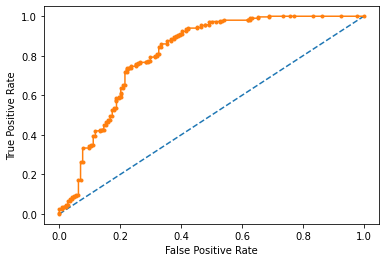

In [100]:
# AUC and ROC for the training data(model_5)



# calculate AUC
auc = metrics.roc_auc_score(scaled_df['Transport'],y_prob_pred_5)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(scaled_df['Transport'],y_prob_pred_5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC: 0.815


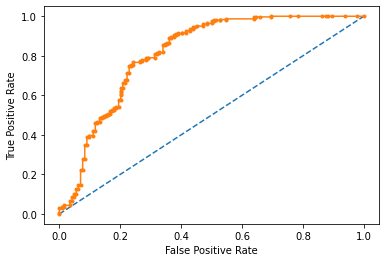

In [101]:
# AUC and ROC for the training data(model_4)



# calculate AUC
auc = metrics.roc_auc_score(scaled_df['Transport'],y_prob_pred_4)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(scaled_df['Transport'],y_prob_pred_4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC: 0.824


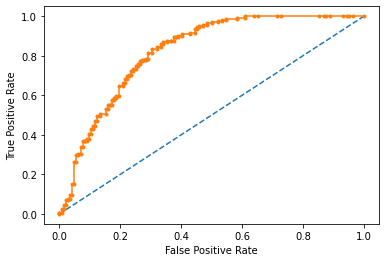

In [102]:
# AUC and ROC for the training data(model_1)



# calculate AUC
auc = metrics.roc_auc_score(scaled_df['Transport'],y_prob_pred_1)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(scaled_df['Transport'],y_prob_pred_1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Only for Predictive purposes of Logistic Regression

Checking the proportion of 1s and 0s in the target variable in both Training and Test data.

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
Train,Test = train_test_split(scaled_df,test_size=0.3,random_state=10,stratify=scaled_df['Transport'])

In [105]:
Train.shape

(310, 9)

In [106]:
Test.shape

(134, 9)

In [107]:
Train['Transport'].value_counts(1)

1.0    0.674194
0.0    0.325806
Name: Transport, dtype: float64

In [108]:
Test['Transport'].value_counts(1)

1.0    0.679104
0.0    0.320896
Name: Transport, dtype: float64

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr = LogisticRegression(penalty='none',solver='newton-cg')


# Using only the Model 6 variables to build the model on the training data and predict on the training as well as test data.

In [111]:
model_sklearn_6=lr.fit(Train[['Distance','license_1','Gender_Male']],Train['Transport'])

In [112]:
model_sklearn_6_pred_train=model_sklearn_6.predict(Train[['Distance','license_1','Gender_Male']])

In [113]:
model_sklearn_6_pred_test =model_sklearn_6.predict(Test[['Distance','license_1','Gender_Male']])

In [114]:
##Predicting on the Test Data

m6_prob = model_sklearn_6.predict_proba(Test[['Distance','license_1','Gender_Male']])[:,1]

In [115]:
m6_prob      #if probability value is needed

array([0.23705951, 0.81975793, 0.08391297, 0.16291965, 0.58545872,
       0.96948743, 0.5715124 , 0.39766577, 0.83388857, 0.32015668,
       0.92020054, 0.70370306, 0.60424605, 0.25766141, 0.95096048,
       0.50665084, 0.48716263, 0.22897809, 0.98298278, 0.8265633 ,
       0.9182712 , 0.92574135, 0.95447117, 0.42446002, 0.14596495,
       0.90797391, 0.76810183, 0.84440905, 0.59175173, 0.14923456,
       0.52611886, 0.97241694, 0.81898512, 0.70261316, 0.49365729,
       0.77269866, 0.75005232, 0.88957985, 0.91629946, 0.09716071,
       0.9182712 , 0.7913015 , 0.95215834, 0.49534596, 0.5980148 ,
       0.79471028, 0.48885053, 0.75005232, 0.78697716, 0.94847894,
       0.93882836, 0.92393489, 0.56641949, 0.85177681, 0.49365729,
       0.65708491, 0.69275208, 0.93731872, 0.93257884, 0.28328672,
       0.63486184, 0.5390572 , 0.80794973, 0.81898512, 0.65860546,
       0.75489277, 0.89160329, 0.63329442, 0.96452123, 0.90577923,
       0.41648131, 0.4741885 , 0.46124912, 0.65860546, 0.83099

# Using only the Model 5 variables to build the model on the training data and predict on the training as well as test data.

In [116]:
model_sklearn_5=lr.fit(Train[['Salary','Distance','license_1','Gender_Male']],Train['Transport'])

In [117]:
model_sklearn_5_pred_train=model_sklearn_5.predict(Train[['Salary','Distance','license_1','Gender_Male']])

In [118]:
model_sklearn_5_pred_test =model_sklearn_5.predict(Test[['Salary','Distance','license_1','Gender_Male']])

In [119]:
##Predicting on the Test Data

m5_prob = model_sklearn_5.predict_proba(Test[['Salary','Distance','license_1','Gender_Male']])[:,1]

# confusion matrix for model 5 and 6

In [120]:
from sklearn import metrics

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

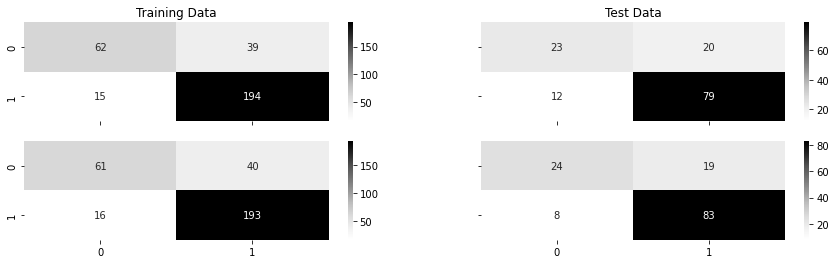

In [122]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True)

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_6_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_10 = sns.heatmap((metrics.confusion_matrix(Train['Transport'],model_sklearn_5_pred_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][0]);



#Plotting confusion matrix for the different models for the Test Data


plot_01 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_sklearn_6_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data')
plot_11 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_sklearn_5_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[1][1]);


# 1.5) Apply KNN Model(4 pts). Interpret the inferences of each model (2 pts)

In [123]:
df

,Age,WorkExp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,28.0,4.0,14.3000,3.2000,1,1,0,0,0
1,23.0,4.0,8.3000,3.3000,1,0,1,0,0
2,29.0,7.0,13.4000,4.1000,1,1,1,0,0
3,28.0,5.0,13.4000,4.5000,1,0,1,1,0
4,27.0,4.0,13.4000,4.6000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
439,37.5,15.5,24.6125,20.3625,0,1,1,0,1
440,37.5,15.5,24.6125,20.3625,0,1,1,0,1
441,37.0,15.5,24.6125,20.3625,0,1,1,0,1
442,37.0,15.5,24.6125,20.3625,0,1,0,0,1


In [124]:
# Arrange data into independent variables and dependent variables
X = df.drop("Transport",axis=1)  ## Features
y = df["Transport"]  ## Target

In [125]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
  #in this case,we have target column which is discrete ,which is classifier.so,we used KNeighborsClassifier.we've KNeighborsRegressor also
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)# fitting our training data

KNeighborsClassifier()

In [127]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
y_train_predict

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [128]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
y_test_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int8)

In [129]:
model_score = KNN_model.score(X_train, y_train)
print(model_score)#accuracy score 

print(metrics.confusion_matrix(y_train, y_train_predict))#confusion matrix

print(metrics.classification_report(y_train, y_train_predict)) #classification report

0.8483870967741935
[[ 68  34]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       102
           1       0.85      0.94      0.89       208

    accuracy                           0.85       310
   macro avg       0.85      0.80      0.82       310
weighted avg       0.85      0.85      0.84       310



In [130]:

model_score = KNN_model.score(X_test, y_test)
print(model_score) #accuracy score

print(metrics.confusion_matrix(y_test, y_test_predict))#confusion matrix

print(metrics.classification_report(y_test, y_test_predict)) #classification report

0.7388059701492538
[[22 20]
 [15 77]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.56        42
           1       0.79      0.84      0.81        92

    accuracy                           0.74       134
   macro avg       0.69      0.68      0.69       134
weighted avg       0.73      0.74      0.73       134



In [131]:
#85 % and 73.88% are accuracies.the gap is not more than 10%.so,it is fine.
#but,i've not scaled  my data.so will scaling improve my performance?

## Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered.

**It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN**
Now lets apply zscore on continues columns and see the performance for KNN

In [132]:
from sklearn.preprocessing import StandardScaler
#zscore transform
ss = StandardScaler() 

X_train = ss.fit_transform(X_train)
#we fit and transform the training data.we only transform test data 
#the train data mean n std deviation,we are using it for calculating the z value of test data as well
X_test = ss.transform(X_test)


In [133]:
#standard scaler function calculates z score,first we take the data n split it into 70:30
#we take the 70% ,when we do fit and transform for this ,mean value and std dev is calculated.z value is calculated for each column separately
#when we do only transform on the test data,it will take the older mean(mu) n std dev(sigma)of the train value data,z score for test score will be calculated

In [134]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier() #default value of n_neighbors=5
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_train_predict = KNN_model.predict(X_train)
y_train_predict

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [136]:
y_test_predict = KNN_model.predict(X_test)
y_test_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1], dtype=int8)

In [137]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8451612903225807
[[ 66  36]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.85      0.65      0.73       102
           1       0.84      0.94      0.89       208

    accuracy                           0.85       310
   macro avg       0.85      0.79      0.81       310
weighted avg       0.85      0.85      0.84       310



In [138]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7835820895522388
[[24 18]
 [11 81]]
              precision    recall  f1-score   support

           0       0.69      0.57      0.62        42
           1       0.82      0.88      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



We can see a significant change in the accuracy scores(85% for train n 78.35 % for test data), lets continue with the scaled data now.

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [139]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error     #Misclassification error (MCE) = 1 - Test accuracy score.
MCE = [1 - x for x in ac_scores]
MCE           #The misclassification error, which tells what proportion of predicted direction did not match with the actuals.

[0.25373134328358204,
 0.23880597014925375,
 0.21641791044776115,
 0.23880597014925375,
 0.22388059701492535,
 0.20895522388059706,
 0.20895522388059706,
 0.19402985074626866,
 0.19402985074626866,
 0.20149253731343286]

In [140]:
#when k=1,3,5,7 .........19,these are errors
#at k=15,MCE is least i.e 19%,

Plot misclassification error vs k (with k value on X-axis) using matplotlib

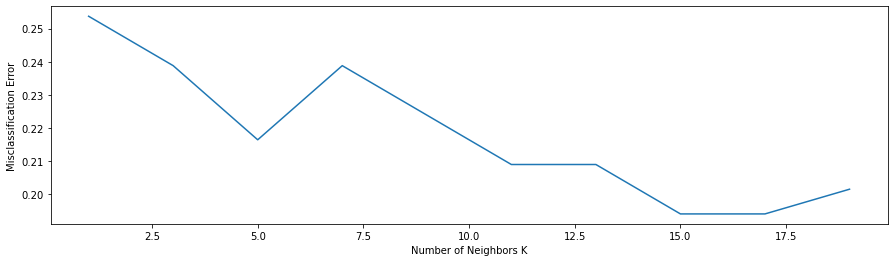

In [141]:
import matplotlib.pyplot as plt
                                      # plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [142]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [143]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8290322580645161
[[ 57  45]
 [  8 200]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68       102
           1       0.82      0.96      0.88       208

    accuracy                           0.83       310
   macro avg       0.85      0.76      0.78       310
weighted avg       0.84      0.83      0.82       310



In [144]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8059701492537313
[[21 21]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.81      0.50      0.62        42
           1       0.81      0.95      0.87        92

    accuracy                           0.81       134
   macro avg       0.81      0.72      0.74       134
weighted avg       0.81      0.81      0.79       134



In [145]:
#this is giving me the best possible performance. 83% and 81%

if i want to go with this particular k value,i can or if i increase  the range of k from 19 to check if there is further decrease in MCE but generally the smaller the k value,the more stronger the model.Too low and too high k value is also not good for my model.That's the reason we've taken 1 to 20 range and we're trying to find the optimum point.

**As the difference between train and test accuracies is less than 10%, it is a valid model**

**Hyper-parameter tunning**

In [146]:
params = {'n_neighbors':[6,8,10,12,14,16,19],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size':list(range(1,30)),
         'p':[1,2],
          'metric':['minkowski','euclidean','manhattan','chebyshev','mahalanobis']}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1,cv=5)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 8120 candidates, totalling 40600 fits


In [ ]:
grid_knn.best_params_

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve
print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_knn.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_knn.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_knn.predict(X_test)))

In [ ]:
from sklearn.metrics import classification_report
print('Classification report Train set :')      
print(classification_report(y_train,grid_knn.predict(X_train)))

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,grid_knn.predict(X_test)))

# 1.6) Bagging ( 4 pts) and Boosting (4 pts), Model Tuning (4 pts).

In [ ]:
df.head()

In [ ]:
# Arrange data into independent variables and dependent variables
X = df.drop("Transport",axis=1)  ## Features
y = df["Transport"]  ## Target

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


# AdaBoost

In [ ]:

from sklearn.ensemble import AdaBoostClassifier #initially we're putting number of estimators as 100
                                                           #it has taken 100 learners
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)


In [ ]:
#performance matrix on train data set
y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))


In [ ]:

#performance matrix on test data set
y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [ ]:
#accuracy=88% for train and 75% for test.the model performance is pretty decent

# Gradient Boosting

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier#by default,n_estimators=100 here
gbcl=GradientBoostingClassifier(random_state=1)
gbcl=gbcl.fit(X_train,y_train)

In [ ]:
#performance matrix on train data set
y_train_predict=gbcl.predict(X_train)
model_score=gbcl.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

In [ ]:
#performance matrix on test data set
y_test_predict=gbcl.predict(X_test)
model_score=gbcl.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [ ]:
#this is giving higher accuracy compared to Adaboost.f1 score is also noticeably better

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

In [ ]:
#performance matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

In [ ]:
#performance matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))      #overfitting
print(metrics.classification_report(y_test,y_test_predict))

In [ ]:
#instead of decision tree,you can pass some other classifier here.

Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Gradient Boosting classifier:
    Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (5 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

In [ ]:
# Arrange data into independent variables and dependent variables
X = df.drop("Transport",axis=1)  ## Features
y = df["Transport"]  ## Target

In [ ]:
X.head(5)

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# 1)LOGISTIC REGRESSION MODEL

In [ ]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)


In [ ]:
#Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)


In [ ]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()
     


Model Evaluation

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)
     


In [ ]:
model.score(X_test,y_test)

AUC and ROC for the training data

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)


AUC and ROC for the test data

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)


Confusion Matrix for the training data

In [ ]:

confusion_matrix(y_train, ytrain_predict)

In [ ]:

print(classification_report(y_train, ytrain_predict))


Confusion Matrix for test data

In [ ]:

cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix


In [ ]:
print(classification_report(y_test, ytest_predict))

# DECISION TREE

In [ ]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
     

In [ ]:
y_train_predict = DT_model.predict(X_train)
y_test_predict=DT_model.predict(X_test)

In [ ]:

## Performance Matrix on train data set

model_score = DT_model.score(X_train, y_train) #ACCURACY SCORE
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))#CONFUSION MATRIX
print(metrics.classification_report(y_train, y_train_predict)) #CLASSIFICATION REPORT


In [ ]:
## Performance Matrix on test data set            
                                               
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)  
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


In [ ]:
 #overfitting
    #accuracy is 100 % for training data but 76 % for test data
        #f1 score is 100 % for training data but 82 % for test data

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

In [ ]:
importances = RF_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:

## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

# AdaBoost

In [ ]:

from sklearn.ensemble import AdaBoostClassifier #initially we're putting number of estimators as 100
                                                           #it has taken 100 learners
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

In [ ]:
#performance matrix on train data set
y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

In [ ]:
#performance matrix on test data set
y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier#by default,n_estimators=100 here
gbcl=GradientBoostingClassifier(random_state=1)
gbcl=gbcl.fit(X_train,y_train)

In [ ]:
#performance matrix on train data set
y_train_predict=gbcl.predict(X_train)
model_score=gbcl.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

In [ ]:
#performance matrix on test data set
y_test_predict=gbcl.predict(X_test)
model_score=gbcl.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train,y_train)

In [ ]:
#performance matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

In [ ]:
#performance matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))      #overfitting
print(metrics.classification_report(y_test,y_test_predict))

In [ ]:
#instead of decision tree,you can use some other classifier also

To assess the quality of our model,here we will use combination of metrics F1 Score and Accuracy. For both the metrics, the higher the value the better a model can classify observations into classes. However, each metric is calculated using a different formula and there are pros and cons to using both.

 F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). It’s often used as a single value that provides high-level information about the model’s output quality. This is a useful measure of the model in the scenarios where one tries to optimize either of precision or recall score and as a result, the model performance suffers.

Mathematically, it can be represented as a harmonic mean of precision and recall score.
F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/


Accuracy score is a machine learning classification model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions. For example: Let’s assume that you were testing your machine learning model with a dataset of 100 records and that your machine learning model predicted all 90 of those instances correctly. The accuracy metric, in this case, would be: (90/100) = 90%. The accuracy rate is great, but it doesn’t tell us anything about the errors our machine learning models make on new data we haven’t seen before. The accuracy metrics is also not reliable for the models trained on imbalanced or skewed datasets.
Mathematically, it represents the ratio of the sum of true positive and true negatives out of all the predictions.


Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

If we look at the accuracy and F1 scores of all the models created, the best performance is being shown by “Gradient Boosting algorithm”.
Its accuracy for the training and test datasets is 89% and 83% respectively, which is decent. Also its F1 score for the training and test datasets is 93% and 88 %,which is quite good and much better than the other models built.


# 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

INSIGHTS

In this classification model ,we have to predict  whether the mode of transport (dependent variable) is “Private transport” or “Public transport” using independent variables  Age,Gender,Engineer,MBA,WorkExp,Salary,Distance,license.We built multiple models such as logistic regression,decision tree, random forest,KNN,AdaBoost,Gradient Boosting and Bagging for this buisness problem and found Gradient boosting to be the best one.

However ,while building the Random forest classifier model,we saw that some variables were of greater importance compared to the other ones.”Distance”and “Transport “ have the highest variable importance while “ license” has the least variable importance.

Due to multicollinearity,the model was getting affected as multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of  regression model.We might not be able to trust the p values then to identify independent variables that are statistically significant ones.While building the logistic regression model,we saw that WorkExp was having very high VIF(VIF means there is multicollinearity) and so we had to get rid of that variables.Also some of the variables’ pvalues were much greater than 0.05 (which means they were statistically insignificant) and so we removed them in building the final logistic regression model.



Recommendations:
    
    
To help the management solve the buisness objective,data collection from different sources can be improved. There are many other factors that influence the choices of mode of transport. 

One of them can be “Cost of transport”. Public transport such as Sea transport is the cheapest means of transporting bulky goods provided the speed  of carriage is not an essential requirement. Rail transport is also a cheaper way of transport over long distances.Private transport is only confined over small distances and can’t be used for carrying higher weights. 

Other factor that can affect our target variable can be “Speed”.The quickest mode of transport is obviously airways whereas the slowest is the water transport. Private vehicles would be of moderate speed.

One factor can be “flexibilty “also.While choosing a particular mode of transport,we have to consider the flexibility also. In this  respect,road transport and private transport would be the best ones. 

Other very important factor affecting the mode of transport can be “Regularity”also. In case of private transport, regularity of service is the most assured.The scheduled movement of public transport can be affected by weather conditions. 

There are many other factors such as Safety,Nature of commodity etc which influence the choice of mode of transport.


The quality of data can be made better so that not much data cleaning would be required.And it should be made sure that the practical implementation of best model is made possible.
